##### 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
db1 = pd.read_csv('weather_data_missing_data.csv')
db1

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,-99999,7,Sunny
2,01-03-2017,28,-99999,Snow
3,01-04-2017,-99999,7,0
4,01-05-2017,32,-99999,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


### replace values in db 

In [4]:
new_db = db1.replace('-99999',value=np.nan)
new_db

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,0
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


##### to replace multiple values 

In [5]:
new_db = db1.replace(to_replace=['-99999','-88888'],value=np.nan) 
new_db

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,0
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


In [6]:
#### replace w.r.t values 
new_db = db1.replace({
    '-99999' : np.nan,
    '0' : 'Sunny'
})
new_db

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,Sunny
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,Sunny
7,01-06-2017,34 F,5,Sunny
8,01-06-2017,34 C,20mph,Sunny
9,01-06-2017,34,20mph,Sunny


In [7]:
df = pd.DataFrame({
    'score': ['exceptional','average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})
df

,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


In [8]:
print(df['score'].unique()) # tells you all the unqiue/distinct values in given column 
print(df['score'].value_counts()) # counts all the unqiue/distinct values in given column
new_df=df.replace(['poor', 'average', 'good', 'exceptional'], [1,2,3,4]) # replace categorical variable into numeric 
new_df

['exceptional' 'average' 'good' 'poor']
exceptional    2
average        2
good           1
poor           1
Name: score, dtype: int64


,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


exceptional    2
average        2
good           1
poor           1
Name: score, dtype: int64
[2 2 1 1]
Sum 6


([<matplotlib.patches.Wedge at 0x7ff5a9eaf990>,
 [Text(-0.9526279613277876, 0.5499999702695114, 'exceptional'),
  Text(1.0298943251329445e-07, -1.0999999999999954, 'average'),
  Text(1.1499999999999888, 1.6150615607812264e-07, 'good'),
  Text(0.5499998364823061, 0.9526280385698485, 'poor')],
 [Text(-0.5196152516333387, 0.29999998378336984, '33.3%\n(2)'),
  Text(5.61760540981606e-08, -0.5999999999999974, '33.3%\n(2)'),
  Text(0.6499999999999936, 9.128608821806931e-08, '16.7%\n(1)'),
  Text(0.29999991080853056, 0.5196152937653719, '16.7%\n(1)')])

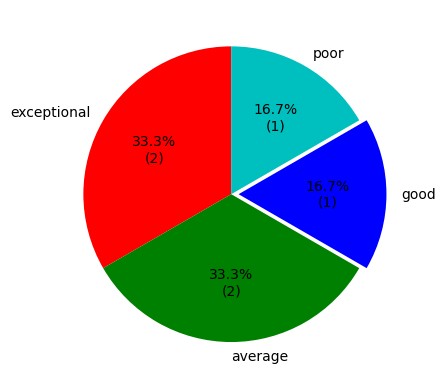

In [9]:
#how many distinct values are there in the frame new_df score column
print(df["score"].value_counts())
df1 = df["score"].value_counts()

def func(pct,allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{0:0.1f}%\n({1:d})".format(pct,absolute)

print(df1.values) # gives all vales 
s = np.sum(df1.values) # gives sum of all values 
print("Sum",s)
#new_df["score"].unique()
df[['score']].nunique()   #will show how many different values are there
plt.pie(
    df1.values,                                            
    labels=df1.index,                                       
    autopct=lambda pct: func(pct,df1.values),                      
    colors=['r','g','b','c','p'],
    explode=(0,0,0.05,0),
    counterclock=True,
    startangle=90
)

([<matplotlib.patches.Wedge at 0x7ff5aa02a410>,
 [Text(0.5499999702695115, 0.9526279613277875, 'exceptional'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'average'),
  Text(1.5448414935947287e-07, -1.0999999999999892, 'good'),
  Text(0.9526280385698485, -0.5499998364823061, 'poor')])

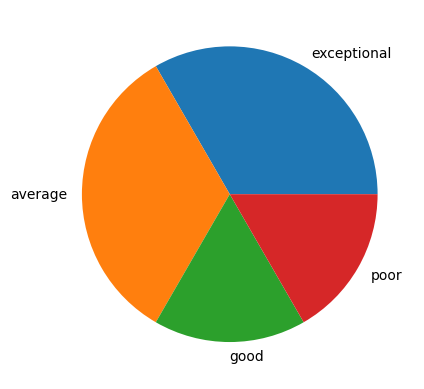

In [10]:
plt.pie(
    df1.values,                                            
    labels=df1.index,                                       
)

In [11]:

new_df['score'].mean()

2.6666666666666665

In [12]:
new_df[(new_df['score']>2) & (df['student']=="parthiv")] # multiple conditions to fliter 

,score,student
2,3,parthiv


### GroupBy 

In [13]:
db = pd.read_csv('weather_by_cities.csv')
db

,day,city,temperature,windspeed,event
0,01-01-2017,new york,32.0,6,Rain
1,01-02-2017,new york,36.0,7,Sunny
2,01-03-2017,new york,28.0,12,Snow
3,01-04-2017,new york,33.0,7,Sunny
4,01-01-2017,mumbai,90.0,5,Sunny
5,01-02-2017,mumbai,85.0,12,Fog
6,01-03-2017,mumbai,87.0,15,Fog
7,01-04-2017,mumbai,92.0,5,Rain
8,01-01-2017,paris,45.0,20,Sunny
9,01-02-2017,paris,NaN,13,Cloudy


In [14]:
g = db.groupby('city')
g

In [15]:
for city,data in g:
    print(city)
    print(data)

mumbai
          day    city  temperature  windspeed  event
4  01-01-2017  mumbai         90.0          5  Sunny
5  01-02-2017  mumbai         85.0         12    Fog
6  01-03-2017  mumbai         87.0         15    Fog
7  01-04-2017  mumbai         92.0          5   Rain
new york
          day      city  temperature  windspeed  event
0  01-01-2017  new york         32.0          6   Rain
1  01-02-2017  new york         36.0          7  Sunny
2  01-03-2017  new york         28.0         12   Snow
3  01-04-2017  new york         33.0          7  Sunny
paris
           day   city  temperature  windspeed   event
8   01-01-2017  paris         45.0         20   Sunny
9   01-02-2017  paris          NaN         13  Cloudy
10  01-03-2017  paris         54.0          8  Cloudy
11  01-04-2017  paris         42.0         10  Cloudy


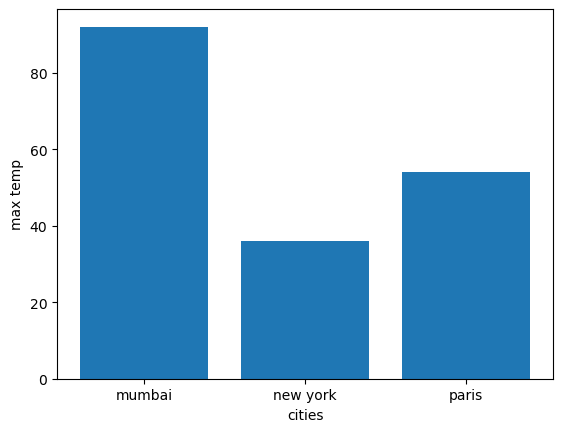

In [16]:
y = g['temperature'].max()
cities = y.index
values = y.values
plt.bar(cities,values)
plt.xlabel('cities')
plt.ylabel("max temp")
plt.show()

In [17]:
tips = sns.load_dataset('tips') # load dataset means built in dataset 
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: >

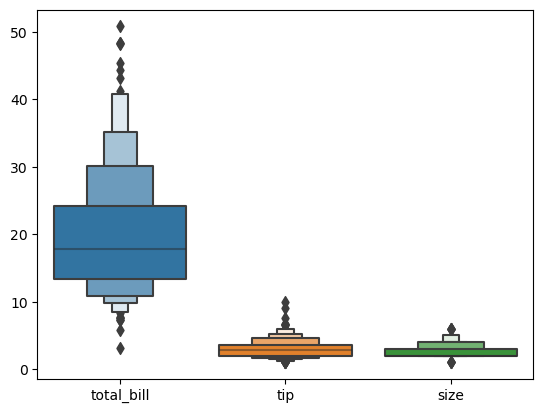

In [18]:

sns.boxenplot(tips)

<Axes: xlabel='sex', ylabel='count'>

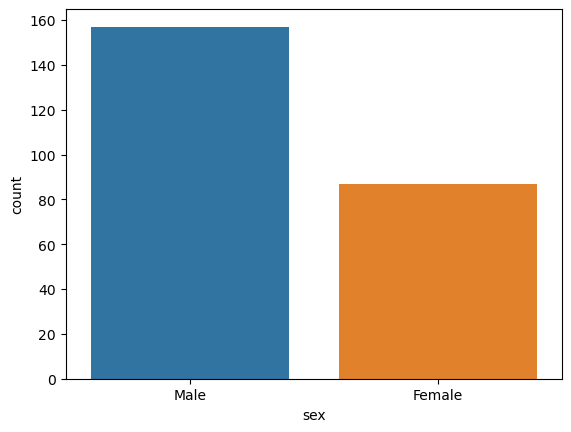

In [19]:

sns.countplot(x = 'sex',data=tips)

<Axes: xlabel='time', ylabel='count'>

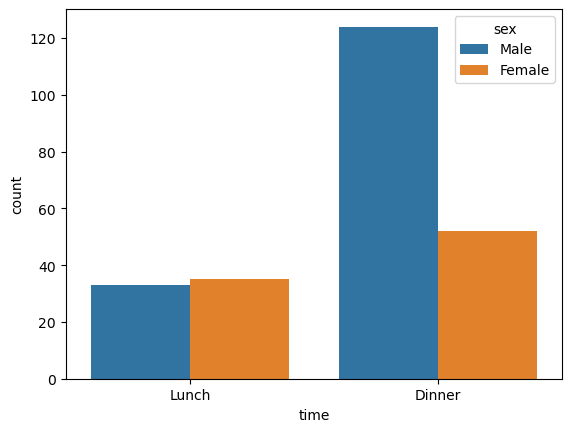

In [20]:
sns.countplot(x='time',hue='sex',data=tips) # hue - divides data into distinct parts

<Axes: xlabel='day', ylabel='total_bill'>

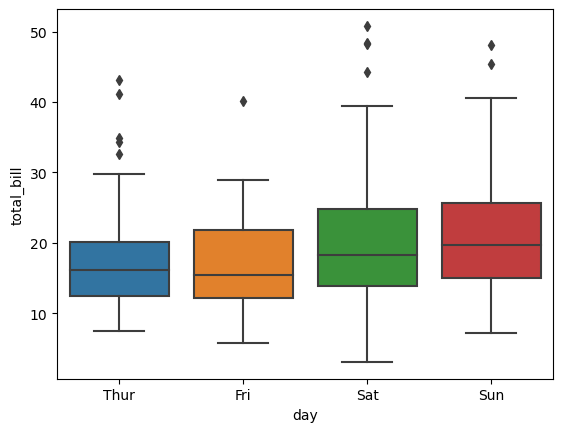

In [21]:
sns.boxplot(x='day',y='total_bill',data=tips)

/tmp/ipykernel_27131/3164941283.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips["total_bill"],kde = True , bins=5,color='darkgreen') # bins decides no of parts to divide destribution to


<Axes: xlabel='total_bill', ylabel='Density'>

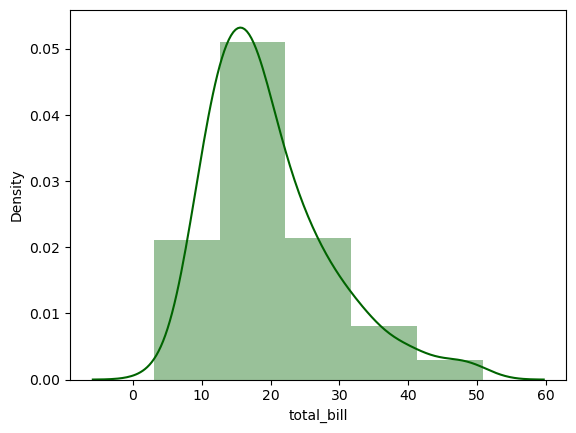

In [22]:
sns.distplot(tips["total_bill"],kde = True , bins=5,color='darkgreen') # bins decides no of parts to divide destribution to 

<Axes: xlabel='total_bill', ylabel='Count'>

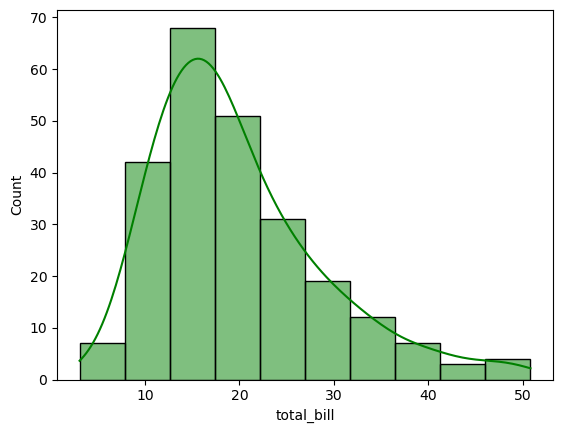

In [23]:
sns.histplot(x = "total_bill",data = tips,bins=10,color='green',kde=True)

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/yankev/test/master/life-expectancy-per-GDP-2007.csv')
df.shape

(55, 5)